In [38]:
import lightgbm as lgb 
from sklearn.datasets import load_diabetes

In [39]:
from lgb2sql import lgb2sql

In [40]:
X,y = load_diabetes(return_X_y=True)
import numpy as np 
X_1 = np.random.rand(442,15)
X = np.concatenate([X,X_1],axis=1)

In [41]:
model = lgb.LGBMRegressor(n_estimators=10,max_depth=5)

In [42]:
model.fit(X,y)

LGBMRegressor(max_depth=5, n_estimators=10)

In [43]:
exporter = lgb2sql(model)

In [44]:
a = exporter.export_sql('','custid','rumo_')

<AxesSubplot:>

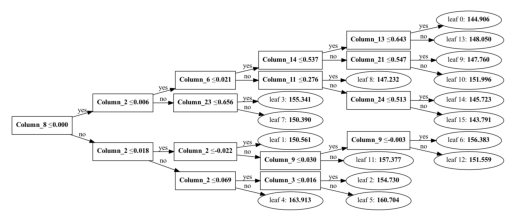

In [45]:
lgb.plot_tree(model)

In [49]:
model.feature_importances_

array([ 2,  2, 23, 14,  1,  2, 10,  0, 14, 12,  2,  7,  0,  6, 10,  2,  3,
        6,  4,  4,  1,  6,  0,  8,  3], dtype=int32)

In [47]:
model.booster_.dump_model()['feature_importances']

{'Column_0': 2,
 'Column_1': 2,
 'Column_2': 23,
 'Column_3': 14,
 'Column_4': 1,
 'Column_5': 2,
 'Column_6': 10,
 'Column_8': 14,
 'Column_9': 12,
 'Column_10': 2,
 'Column_11': 7,
 'Column_13': 6,
 'Column_14': 10,
 'Column_15': 2,
 'Column_16': 3,
 'Column_17': 6,
 'Column_18': 4,
 'Column_19': 4,
 'Column_20': 1,
 'Column_21': 6,
 'Column_23': 8,
 'Column_24': 3}

In [14]:
exporter

['Column_0',
 'Column_1',
 'Column_2',
 'Column_3',
 'Column_4',
 'Column_5',
 'Column_6',
 'Column_7',
 'Column_8',
 'Column_9']

In [48]:
for k in exporter.feature_names:
    if k not in a : 
        print(k)

Column_7
Column_12
Column_22


In [36]:
2,  2, 23, 14,  1,  2, 10,  0, 14, 12,  2,  7,  0,  6, 10,  2,  3,
        6,  4,  4,  1,  6,  0,  8,  3

IndentationError: unexpected indent (3844342397.py, line 2)

In [51]:
print(a)

SELECT 
 custid 
 ,subtree_0+subtree_1+subtree_2+subtree_3+subtree_4+subtree_5+subtree_6+subtree_7+subtree_8+subtree_9 AS Score 
 FROM( 
SELECT 
 custid 
,CASE 
WHEN Column_8 <= 1.0000000180025095e-35 
  AND Column_2 <= 0.006188884713822097 
 AND Column_6 <= 0.021027815919496564 
 AND Column_14 <= 0.5368727934685026 
 AND Column_13 <= 0.6425842208030538 
THEN  144.90634266995366 
 WHEN Column_8 <= 1.0000000180025095e-35 
  AND Column_2 <= 0.006188884713822097 
 AND Column_6 <= 0.021027815919496564 
 AND Column_14 <= 0.5368727934685026 
 AND Column_13 > 0.6425842208030538 
THEN  148.05013576587942 
 WHEN Column_8 <= 1.0000000180025095e-35 
  AND Column_2 <= 0.006188884713822097 
 AND Column_6 <= 0.021027815919496564 
 AND Column_14 > 0.5368727934685026 
 AND Column_21 <= 0.5468401179627538 
THEN  147.76013577183988 
 WHEN Column_8 <= 1.0000000180025095e-35 
  AND Column_2 <= 0.006188884713822097 
 AND Column_6 <= 0.021027815919496564 
 AND Column_14 > 0.5368727934685026 
 AND Column_21 

In [52]:
mapper = {'f_1':12,'f_12':22}

In [57]:
dict(sorted(mapper.items(),key=lambda x:x[0],reverse=True))

{'f_12': 22, 'f_1': 12}